In [12]:
# for dataset management
import pandas as pd

# for data visualization 
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_16160\3420647558.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Import and process the data

In [16]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [17]:
wine_df = pd.read_csv(url, sep=';')
wine_df = wine_df[wine_df['total sulfur dioxide']<200]

In [18]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Re-orgnize the data into train/test in Dataloaders

In [1]:
import sys
sys.path.append('../utils')
sys.path.append('../models')

In [2]:
from data_loaders import reorgnize_dataloaders

In [3]:
# create dataloaders    
train_loader, test_loader = reorgnize_dataloaders(train_batch_size=32, test_batch_size=32)

torch.Size([1597, 11])


In [4]:
# create class for the model with batch-normalization  
from wine_batchNorm import WineModel_BNorm

# Train the model

In [5]:
from training import trainTheM0del

In [ ]:
num_epochs = 1000

# The experiment

In [8]:
# train the model without batch normalization
model = WineModel_BNorm()
lossesNo, train_accuracyNo, test_accuracyNo = trainTheM0del(
    doBN=False,
    model=WineModel_BNorm(),
    train_loader=train_loader,
    test_loader=test_loader,
    num_epochs=num_epochs)

In [14]:
# train the model with batch normalization
lossesYes, train_accuracyYes, test_accuracyYes = trainTheM0del(
    doBN=True,
    model=WineModel_BNorm(),
    train_loader=train_loader,
    test_loader=test_loader,
    num_epochs=num_epochs)

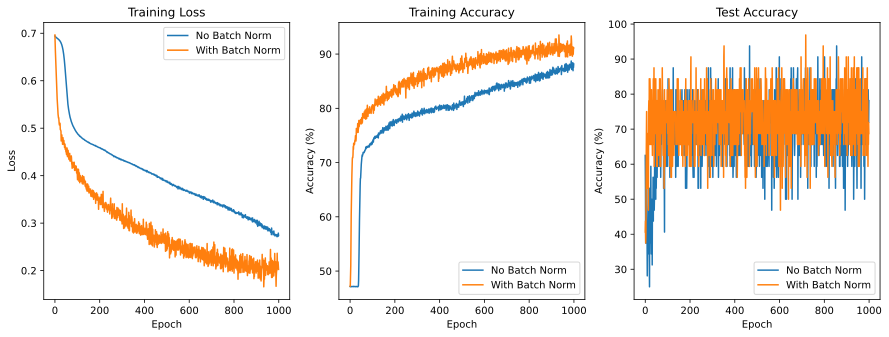

In [15]:
# plot the results
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(lossesNo,label='No Batch Norm')
ax[0].plot(lossesYes,label='With Batch Norm')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].set_title('Training Loss')

ax[1].plot(train_accuracyNo,label='No Batch Norm')  
ax[1].plot(train_accuracyYes,label='With Batch Norm')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend()
ax[1].set_title('Training Accuracy')

ax[2].plot(test_accuracyNo,label='No Batch Norm')
ax[2].plot(test_accuracyYes,label='With Batch Norm')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Accuracy (%)')
ax[2].legend()
ax[2].set_title('Test Accuracy')

plt.show()